In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,NaN,2.59,2.87,21.0,NaN,NaN,2.69,0.39,NaN,4.32,NaN,NaN,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,NaN,2.48,23.0,102.0,NaN,0.75,NaN,NaN,NaN,0.70,NaN,750.0
175,13.27,NaN,2.26,20.0,120.0,NaN,0.69,NaN,NaN,NaN,0.59,NaN,835.0
176,NaN,2.59,2.37,20.0,NaN,NaN,0.68,0.53,NaN,9.30,NaN,NaN,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	30
float64		column 2	15
float64		column 3	0
float64		column 4	15
float64		column 5	46
float64		column 6	60
float64		column 7	16
float64		column 8	15
float64		column 9	76
float64		column 10	31
float64		column 11	45
float64		column 12	76
float64		column 13	31


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,148.000000,163.000000,178.000000,163.000000,132.000000,118.000000,162.000000,163.000000,102.000000,147.000000,133.000000,102.000000,147.000000
mean,12.960946,2.307423,2.366517,19.571779,99.386364,2.286610,2.020617,0.362454,1.568529,4.947075,0.959925,2.623627,753.428571
std,0.825120,1.091239,0.274344,3.352583,14.614981,0.588314,0.986827,0.123878,0.606882,2.245572,0.237683,0.700126,319.973736
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.250000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,290.000000
25%,12.320000,1.595000,2.210000,17.450000,88.000000,1.782500,1.205000,0.265000,1.140000,3.065000,0.770000,2.072500,497.500000
50%,13.010000,1.870000,2.360000,19.500000,97.000000,2.335000,2.135000,0.340000,1.555000,4.600000,0.960000,2.760000,675.000000
75%,13.622500,3.010000,2.557500,21.500000,107.000000,2.747500,2.875000,0.445000,1.870000,6.115000,1.120000,3.200000,1002.500000
max,14.830000,5.650000,3.230000,30.000000,162.000000,3.850000,3.930000,0.660000,3.580000,11.750000,1.710000,3.920000,1680.000000


<AxesSubplot:>

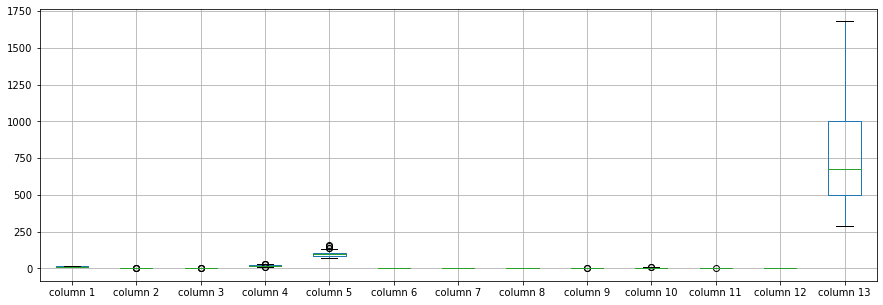

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.960946
column 2       2.307423
column 3       2.366517
column 4      19.571779
column 5      99.386364
column 6       2.286610
column 7       2.020617
column 8       0.362454
column 9       1.568529
column 10      4.947075
column 11      0.959925
column 12      2.623627
column 13    753.428571
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.089332,0.207663,-0.326914,0.231172,0.342552,0.251528,-0.200793,0.139988,0.557600,-0.104139,0.121231,0.672688
column 2,0.089332,1.000000,0.182512,0.258085,-0.091679,-0.252397,-0.427709,0.294883,-0.139922,0.219912,-0.541423,-0.353709,-0.169426
column 3,0.207663,0.182512,1.000000,0.441905,0.142073,0.073220,0.107444,0.205039,-0.042417,0.176721,-0.091250,-0.026381,0.236575
column 4,-0.326914,0.258085,0.441905,1.000000,-0.100683,-0.323325,-0.381513,0.380038,-0.245087,-0.128237,-0.228180,-0.286718,-0.446729
column 5,0.231172,-0.091679,0.142073,-0.100683,1.000000,0.160877,0.143886,-0.320901,0.199106,0.114863,0.007145,-0.025856,0.406233
column 6,0.342552,-0.252397,0.073220,-0.323325,0.160877,1.000000,0.888776,-0.430515,0.664463,-0.001926,0.321742,0.686721,0.479938
column 7,0.251528,-0.427709,0.107444,-0.381513,0.143886,0.888776,1.000000,-0.554071,0.674958,-0.124157,0.545152,0.788528,0.530576
column 8,-0.200793,0.294883,0.205039,0.380038,-0.320901,-0.430515,-0.554071,1.000000,-0.354272,0.091315,-0.221496,-0.537481,-0.336425
column 9,0.139988,-0.139922,-0.042417,-0.245087,0.199106,0.664463,0.674958,-0.354272,1.000000,-0.037191,0.265042,0.511938,0.318764
column 10,0.557600,0.219912,0.176721,-0.128237,0.114863,-0.001926,-0.124157,0.091315,-0.037191,1.000000,-0.483067,-0.377683,0.442548


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+54,13+54+54,13+54+54,13+54+54+54+54,13+54+54+54+54+54,13+54+54+54+54+54+54,13+54+54+54+54+54,13+54+54+54+54,13+54+54+54,13+54+54,13+54,13], vae_layer = False, seed = 540)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 785.2241377397017
Epoch: 1 , loss: 788.3516290838069
Epoch: 2 , loss: 793.3530828302556
Epoch: 3 , loss: 789.1841430664062
Epoch: 4 , loss: 790.5913918235085
Epoch: 5 , loss: 782.9283558238636
Epoch: 6 , loss: 793.3140258789062
Epoch: 7 , loss: 792.5792125355114
Epoch: 8 , loss: 787.8812644264915
Epoch: 9 , loss: 788.6957286487926
Epoch: 10 , loss: 793.7159978693181
Epoch: 11 , loss: 793.9582242098721
Epoch: 12 , loss: 786.8758322975852
Epoch: 13 , loss: 790.0813043767756
Epoch: 14 , loss: 789.3467129794034
Epoch: 15 , loss: 789.5275629216975
Epoch: 16 , loss: 793.4610262784091
Epoch: 17 , loss: 791.9517156427556
Epoch: 18 , loss: 785.5469499067826
Epoch: 19 , loss: 786.9767123135654
Epoch: 20 , loss: 796.5822143554688
Epoch: 21 , loss: 789.8771084872159
Epoch: 22 , loss: 791.8876731178977
Epoch: 23 , loss: 792.1595514470881
Epoch: 24 , loss: 791.8242797851562
Epoch: 25 , loss: 799.1519719904119
Epoch:

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,-13.220509,0.000000,0.0,0.0,-117.979233,-2.781394,0.0,0.000000,-1.802393,0.000000,-1.022541,-2.911685,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
174,0.000000,-3.864920,0.0,0.0,0.000000,-1.756441,0.0,-0.392974,-1.369949,-7.255930,0.000000,-1.516951,0.0
175,0.000000,-4.240880,0.0,0.0,0.000000,-1.552423,0.0,-0.397658,-1.315206,-10.161688,0.000000,-1.522715,0.0
176,-13.119330,0.000000,0.0,0.0,-119.950952,-1.600901,0.0,0.000000,-1.415120,0.000000,-0.555075,-1.571813,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(4352.293539519902, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.39936340398245523

In [18]:
new_df.iloc[66,:]

column 1     13.110000
column 2      1.010000
column 3      1.700000
column 4     15.000000
column 5      0.046487
column 6      2.980000
column 7      0.046943
column 8      0.260000
column 9      0.042638
column 10     0.047027
column 11     1.120000
column 12     0.045929
column 13     0.047051
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.230000,1.710000,2.43,15.6,127.000000,2.800000,3.06,0.280000,2.290000,5.640000,1.040000,3.920000,1065.0
1,13.200000,1.780000,2.14,11.2,100.000000,2.650000,2.76,0.260000,1.280000,4.380000,1.050000,3.400000,1050.0
2,13.160000,2.360000,2.67,18.6,101.000000,2.800000,3.24,0.300000,2.810000,5.680000,1.030000,3.170000,1185.0
3,14.370000,1.950000,2.50,16.8,113.000000,3.850000,3.49,0.240000,2.180000,7.800000,0.860000,3.450000,1480.0
4,0.019491,2.590000,2.87,21.0,0.020767,0.018606,2.69,0.390000,0.017607,4.320000,0.017459,0.018315,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.650000,2.45,20.5,95.000000,1.680000,0.61,0.520000,1.060000,7.700000,0.640000,1.740000,740.0
174,13.400000,0.045080,2.48,23.0,102.000000,0.043559,0.75,0.037026,0.040051,0.044070,0.700000,0.043049,750.0
175,13.270000,0.039120,2.26,20.0,120.000000,0.037577,0.69,0.032342,0.034794,0.038312,0.590000,0.037285,835.0
176,0.050670,2.590000,2.37,20.0,0.049048,0.049099,0.68,0.530000,0.044880,9.300000,0.044925,0.048187,840.0


In [20]:
imputations[-1].to_excel("Wine_AW_20(imp).xlsx", index=False, header=False)